In [ ]:
import numpy as np
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


11490434/11490434 [==============================] - 0s 0us/step


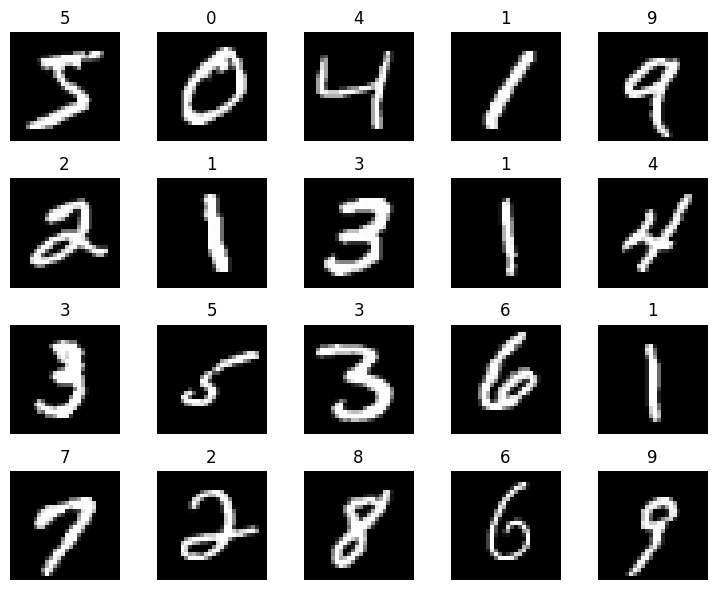

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to plot images in a grid
def plot_images(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*1.5, num_rows*1.5))
    axes = axes.flatten()
    for img, lbl, ax in zip(images, labels, axes):
        ax.imshow(img, cmap='gray')
        ax.set_title(lbl)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Select a subset of the data to plot (e.g., the first 20 images)
num_images = 20
plot_images(x_train[:num_images], y_train[:num_images], num_rows=4, num_cols=5)


In [ ]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


https://www.tensorflow.org/guide/tensor

In [ ]:
var = tf.Variable([0.0, 0.0, 0.0])
print(var)
var.assign([1, 2, 3])
print(var)
var.assign_add([1, 1, 1])
print(var)

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>


In [ ]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [ ]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [ ]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

In [ ]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [ ]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [ ]:
mod = MyModule(3)
print(mod)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

In [ ]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [ ]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

https://www.tensorflow.org/guide/basics

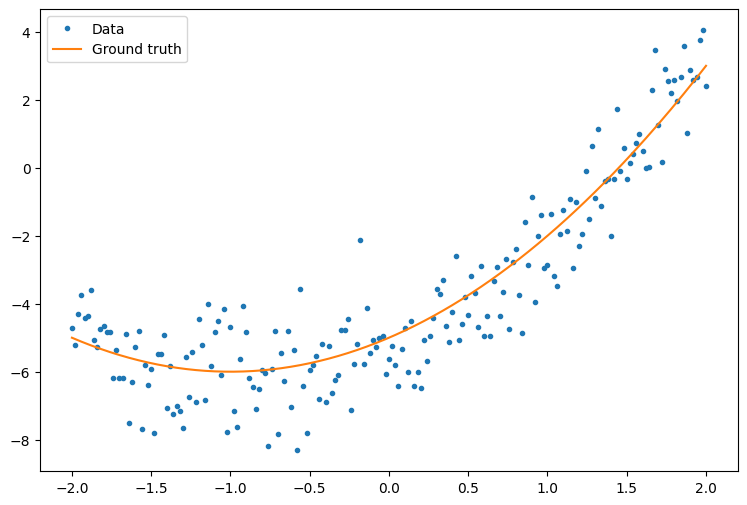

In [ ]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend();

In [ ]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])

  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [ ]:
quad_model = Model()

In [ ]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

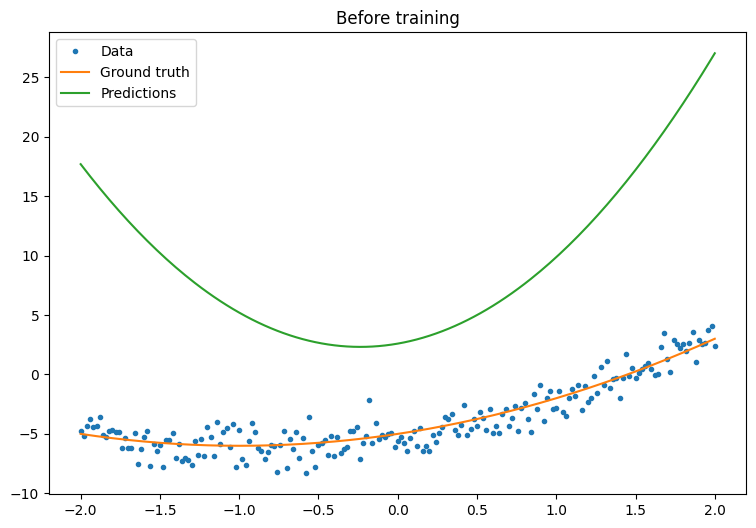

In [ ]:
plot_preds(x, y, f, quad_model, 'Before training')

In [ ]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

In [ ]:
# Iterate through the dataset and print batches
for batch in dataset:
    x_batch, y_batch = batch
    print("Features batch:\n", x_batch.numpy())
    print("Labels batch:\n", y_batch.numpy())
    print("Batch size:", x_batch.shape[0])  # Should be equal to batch_size (or smaller for the last batch)
    print("\n---\n")


Features batch:
 [ 0.88  1.52  1.18  0.34  1.28  0.48  0.92 -0.44  1.98  1.    1.54 -1.92
 -1.68  0.82  0.5   1.3   0.8   0.6   0.08  1.74  1.24 -1.44  0.68 -1.8
  1.36 -1.52 -0.96 -1.66 -0.34 -1.64  1.66 -1.4 ]
Labels batch:
 [-2.87407     0.12981635 -0.9994867  -3.3071153   0.636122   -3.7876441
 -3.941742   -6.7998376   4.0454845  -2.8491638   0.4162917  -4.4108796
 -6.187538   -3.7428865  -4.3349957  -0.87930924 -2.3826952  -4.9421377
 -5.322897    2.9122128  -0.10152155 -5.4762897  -2.9230614  -4.655547
 -0.39875832 -6.398058   -7.6192427  -4.893363   -6.2326875  -7.506109
  2.2890878  -7.0580506 ]
Batch size: 32

---

Features batch:
 [-1.56 -0.64 -0.92 -0.24  0.54  1.84  0.96 -1.48  1.42  1.56  0.04  0.06
 -1.38  0.64  0.86 -1.84  0.26 -1.2  -0.88  1.44  1.76 -0.38  0.46  1.34
  0.38 -0.98  1.9  -0.74  0.2  -1.46 -0.02  0.58]
Labels batch:
 [-7.6727266  -4.801249   -4.075267   -7.12163    -3.6815057   2.662323
 -1.3936455  -7.801766   -0.32194734  0.7295604  -5.8002267  -6.41990

Mean squared error for step 0: 71.511
Mean squared error for step 10: 4.685
Mean squared error for step 20: 2.262
Mean squared error for step 30: 1.437
Mean squared error for step 40: 1.152
Mean squared error for step 50: 1.058
Mean squared error for step 60: 1.021
Mean squared error for step 70: 1.007
Mean squared error for step 80: 1.003
Mean squared error for step 90: 1.003




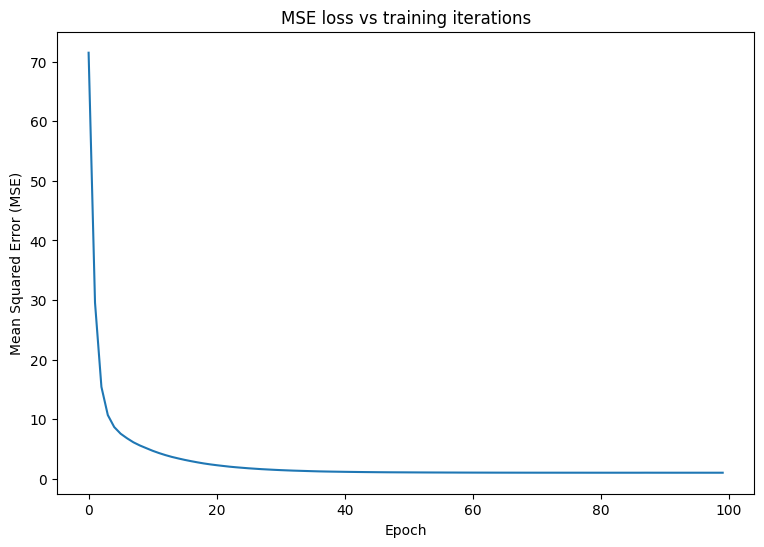

In [ ]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # Update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # Keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

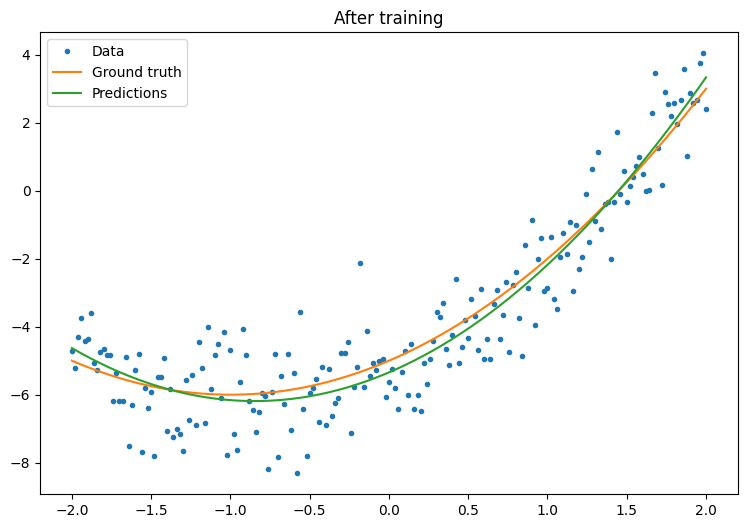

In [ ]:
plot_preds(x, y, f, quad_model, 'After training')

In [ ]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)])

In [ ]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,b
                        epochs=100,
                        batch_size=32,
                        verbose=0)

new_model.save('./my_new_model')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


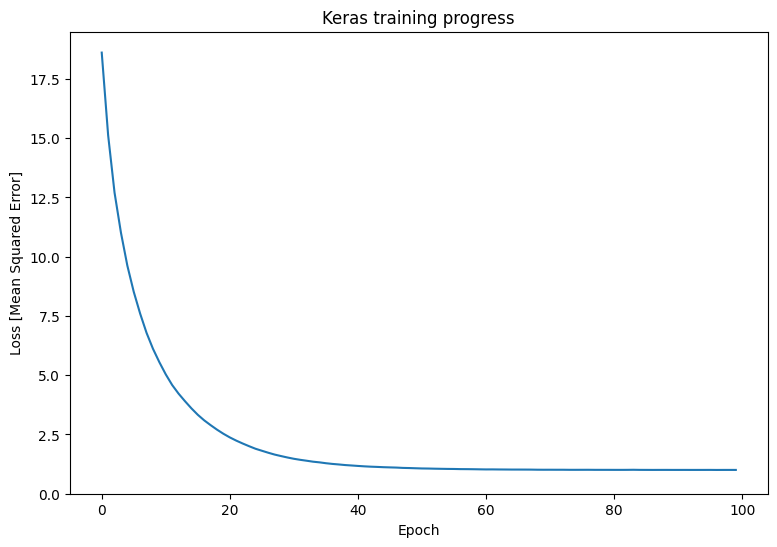

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

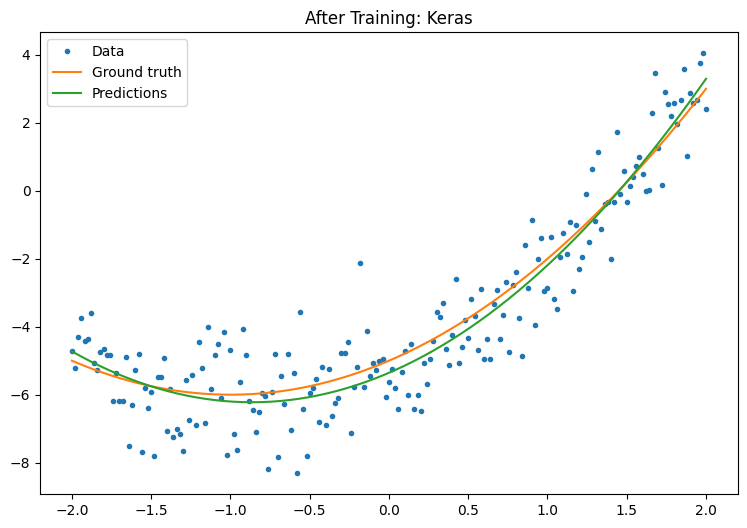

In [ ]:
plot_preds(x, y, f, new_model, 'After Training: Keras')

In [ ]:
import tensorflow as tf

my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])


In [ ]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [ ]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.math.argmax(my_variable))

# This creates a new tensor; it does not reshape the variable.
print("\nCopying and reshaping: ", tf.reshape(my_variable, [1,4]))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)

Copying and reshaping:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


In [ ]:
a = tf.Variable([2.0, 3.0])
# This will keep the same dtype, float32
a.assign([1, 2])
# Not allowed as it resizes the variable:
try:
  a.assign([1.0, 2.0, 3.0])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (2,), and the assigned value shape (3,) are incompatible.


In [ ]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy())
print(b.numpy())

# There are other versions of assign
print(a.assign_add([2,3]).numpy())  # [7. 9.]
print(a.assign_sub([7,9]).numpy())  # [0. 0.]

[5. 6.]
[2. 3.]
[7. 9.]
[0. 0.]


In [ ]:
# Create a and b; they will have the same name but will be backed by
# different tensors.
a = tf.Variable(my_tensor, name="Mark")
# A new variable with the same name, but different value
# Note that the scalar add is broadcast
b = tf.Variable(my_tensor + 1, name="Mark")

# These are elementwise-unequal, despite having the same name
print(a == b)

tf.Tensor(
[[False False]
 [False False]], shape=(2, 2), dtype=bool)


In [ ]:
with tf.device('CPU:0'):

  # Create some tensors
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
  c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
with tf.device('CPU:0'):
  a = tf.Variable([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
  b = tf.Variable([[1.0, 2.0, 3.0]])

with tf.device('GPU:0'):
  # Element-wise multiply
  k = a * b

print(k)

tf.Tensor(
[[ 1.  4.  9.]
 [ 4. 10. 18.]], shape=(2, 3), dtype=float32)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [ ]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [ ]:
layer = tf.keras.layers.Dense(2, activation='relu')
print(layer)
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

# print(layer.trainable_variables)

In [ ]:
# Import TensorFlow
import tensorflow as tf

# Create the Dense layer
layer = tf.keras.layers.Dense(2, activation='relu')

# Create a Sequential model and add the layer to it
model = tf.keras.Sequential([
    layer
])

# Assuming we have some input data
input_data = tf.random.normal([5, 3])  # A batch of 5 samples, each with 3 features

# Pass the input data through the model
output_data = model(input_data)
print(input_data)
print(output_data)


tf.Tensor(
[[-1.4788475  -1.7540263  -0.2334006 ]
 [-0.9187146   0.10577468 -1.7612205 ]
 [-1.2553536  -0.07802648  1.3001759 ]
 [-1.752519   -0.10539797  1.4563681 ]
 [ 0.4986832  -0.27851194  1.5495936 ]], shape=(5, 3), dtype=float32)
tf.Tensor(
[[0.        0.       ]
 [0.        1.6637256]
 [0.        0.       ]
 [0.        0.       ]
 [2.0240898 0.       ]], shape=(5, 2), dtype=float32)


In [ ]:
import tensorflow as tf

# Define a simple model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Define some dummy input data
x = tf.constant([[1.0, 2.0, 3.0]])

# Start a GradientTape context
with tf.GradientTape() as tape:
    # Perform a forward pass through the model
    y = model(x)
    # Compute a dummy loss
    loss = tf.reduce_mean(y)

# Get the list of variables that were watched
watched_vars = tape.watched_variables()

# Print the names of the watched variables
print([var.name for var in watched_vars])


['dense_11/kernel:0', 'dense_11/bias:0', 'dense_12/kernel:0', 'dense_12/bias:0']


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x**2

# dy = 2x * dx
dy_dx = tape.gradient(y, x)
print(dy_dx.numpy())

6.0
